In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors as mcolors
import matplotlib.ticker as tkr

sns.set(font_scale=1.5)

data_folder = '../data/'
figures_folder = '../figures/'

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv('EDCE_Coursebook.csv')

# Section representation

Here, we check in which sections people are. We want to make sure that it's around 50-50.

In [3]:
nbr_civil = np.sum(df['In which section are you?'] == 'Civil Engineering') 
nbr_env = len(df)-nbr_civil

In [4]:
print("Percentage of PhDs in Civil Engineering: {:.2f}%".format(nbr_civil/len(df)*100))
print("Percentage of PhDs in Environmental Science: {:.2f}%".format(nbr_env/len(df)*100))

Percentage of PhDs in Civil Engineering: 58.33%
Percentage of PhDs in Environmental Science: 41.67%


# Credits achieved

Here, we want to check the number of credits achieved by the PhDs and if it's outside of the EDCE coursebook.

In [5]:
credits_achieved = df['How many credits have you currently achieved?'].values

Text(0, 0.5, '# People')

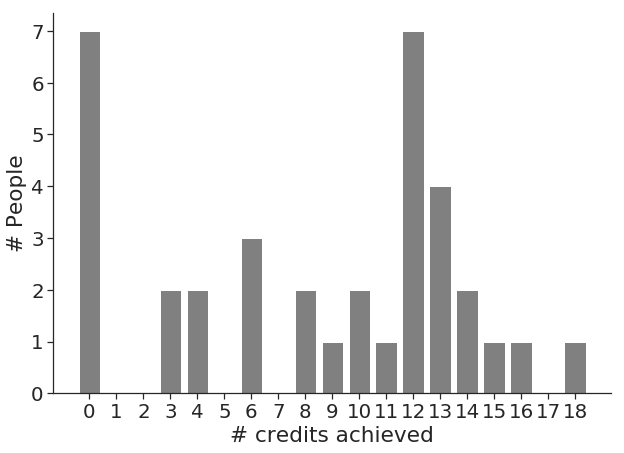

In [6]:
plt.figure(figsize=(10, 7), frameon=False)

sns.set_context("paper")
sns.set(font_scale = 1.8)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

credits = range(0, 19)

cred_ach_bar = []

for x in credits:
    cred_ach_bar.append(np.sum(credits_achieved==x))

plt.bar(credits, cred_ach_bar, facecolor='gray')
plt.xticks(credits)

plt.xlabel('# credits achieved')
plt.ylabel('# People')

We have **quite a lot of people with 0 credits achieved**. The rest are distributed around the required 12 credits. For the next part, we need to remove people who didn't achieve any credits.

In [7]:
some_credits_achieved = credits_achieved != 0

In [8]:
credits_outside_EDCE = df['How many of these credits were obtained outside the EDCE coursebook?'].values

In [9]:
credits_outside_EDCE = credits_outside_EDCE[some_credits_achieved]

Text(0, 0.5, '# People')

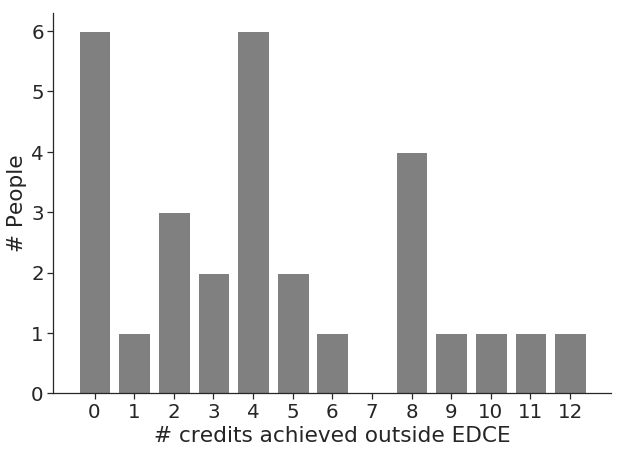

In [10]:
plt.figure(figsize=(10, 7), frameon=False)

sns.set_context("paper")
sns.set(font_scale = 1.8)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

credits = range(0, 13)

cred_out_EDCE_bar = []

for x in credits:
    cred_out_EDCE_bar.append(np.sum(credits_outside_EDCE==x))

plt.bar(credits, cred_out_EDCE_bar, facecolor='gray')
plt.xticks(credits)

plt.xlabel('# credits achieved outside EDCE')
plt.ylabel('# People')

Among the people that have achieved some credits, quite a lot have done all of their credits in the EDOC coursebook. Only a small part of the PhDs have done most of their courses outside of the EDCE coursebook.

In [11]:
credits_in_EDCE = credits_achieved[some_credits_achieved] - credits_outside_EDCE

In [12]:
perc_in_EDCE = []

for i in range(len(credits_in_EDCE)):
    perc_in_EDCE.append(100*credits_in_EDCE[i]/credits_achieved[some_credits_achieved][i])
perc_in_EDCE = np.array(perc_in_EDCE)

Text(0, 0.5, '# People')

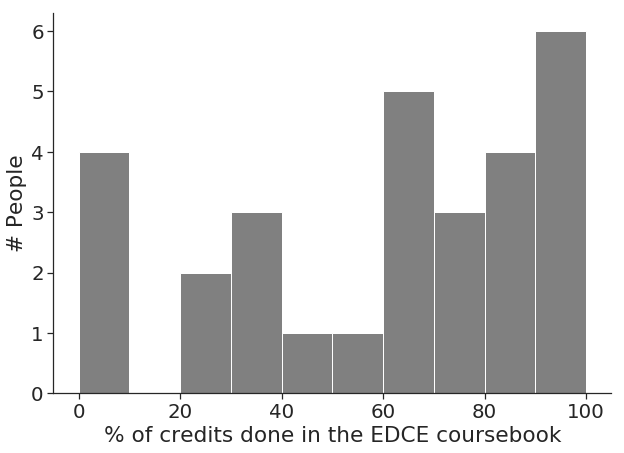

In [13]:
plt.figure(figsize=(10, 7), frameon=False)

sns.set_context("paper")
sns.set(font_scale = 1.8)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.hist(perc_in_EDCE, facecolor='gray', align='mid', bins=10*np.arange(11))

plt.xlabel('% of credits done in the EDCE coursebook')
plt.ylabel('# People')

In [14]:
print("Average percentage of credits done in the EDCE coursebook: {:.2f}%".format(np.mean(perc_in_EDCE)))
print("Median percentage of credits done in the EDCE coursebook: {:.2f}%".format(np.median(perc_in_EDCE)))
print("STD percentage of credits done in the EDCE coursebook: {:.2f}%".format(np.std(perc_in_EDCE)))
print()
print("# People with 0% done in the EDCE coursebook: {} ({:.2f}%)".format(np.sum(perc_in_EDCE==0), 100*np.sum(perc_in_EDCE==0)/len(perc_in_EDCE)))
print("# People with 100% done in the EDCE coursebook: {} ({:.2f}%)".format(np.sum(perc_in_EDCE==100), 100*np.sum(perc_in_EDCE==100)/len(perc_in_EDCE)))

Average percentage of credits done in the EDCE coursebook: 59.49%
Median percentage of credits done in the EDCE coursebook: 66.67%
STD percentage of credits done in the EDCE coursebook: 33.65%

# People with 0% done in the EDCE coursebook: 4 (13.79%)
# People with 100% done in the EDCE coursebook: 6 (20.69%)


### Comment: 

We've seen that among the people that have done some credits, only very few of them didn't do any credits in the EDCE coursebook. From the comments, 2 of these people had already done some courses in this coursebook during their master. 

The PhD students are usually doing around 60% of their courses among the courses in the EDCE coursebook but there is a high standard deviation (30%).

# Courses selection

Here, we just want to have a look how people selected their courses and what type of courses they like.

In [15]:
arr = []
for elem in df['How did you proceed to select the course(s) you attended? (Multiple choices are possible)'].values:
    arr.append(elem.split(';'))
    
flatten = lambda l: [item for sublist in l for item in sublist]

arr = np.array(flatten(arr))

In [16]:
long_str = ['After discussing with my colleagues',
           'After reading the course book of other doctoral programs',
           'Following my advisor suggestions',
           'Looking for courses of my interest in the master programs',
           'On the EDCE program webpage',
           'Searching on the EPFL website for courses of interest',
           'Using IS-Academia course book']


str_ = ['Colleagues', 
        'Other coursebook', 
        'Advisor', 
        'Master',
        'EDCE page', 
        'EPFL website', 
        'IS-Academia']

counts = []
probas = []
for val in long_str:
    counts.append(np.sum(arr == val))
    probas.append(counts[-1]/len(df))

Text(0.5, 1.08, 'How did you proceed to select the course(s) you attended?')

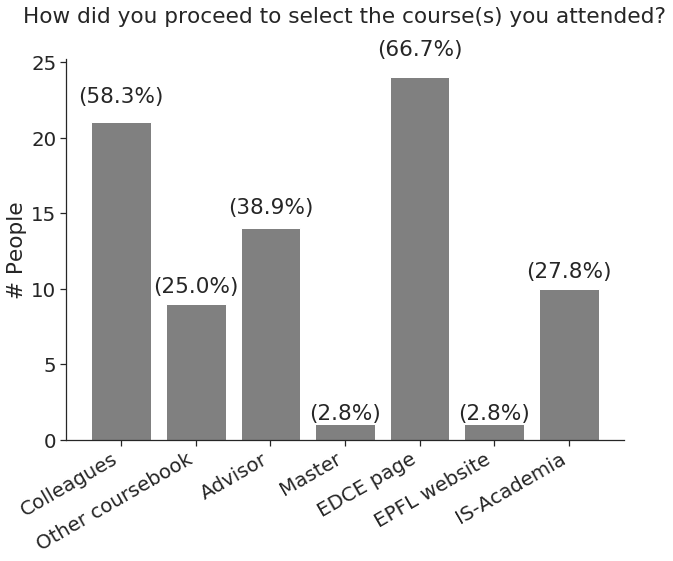

In [17]:
plt.figure(figsize=(10, 7), frameon=False)

sns.set_context("paper")
sns.set(font_scale = 1.8)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

rects = plt.bar(str_, counts, facecolor='gray')

for label in ax.get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment("right")
    

for i, rect in enumerate(rects):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
            '({:.1f}%)'.format(100*probas[i]),
            ha='center', va='bottom')


plt.ylabel('# People')

plt.title('How did you proceed to select the course(s) you attended?', y=1.08)

In [18]:
arr = []
for elem in df['Select the type(s) of course format that you prefer? (Multiple choices are possible)'].values:
    arr.append(elem.split(';'))
    
arr = np.array(flatten(arr))

In [19]:
long_str = ['Block course (5-10 days of courses in a row)',
           'Class from the bachelor/master course books',
           'MOOC (Online course)', 
           'Project-oriented learning',
           'Reading/journal club',
           'Semester course (2-3 hours every week during one semester)',
           'Summer/Winter school', 
           'Workshops']


str_ = ['Block course',
       'Bachelor/Master',
       'MOOC',
       'Project',
       'Reading',
       'Semester course',
       'Summer/Winter School',
       'Workshops']

counts = []
probas = []
for val in long_str:
    counts.append(np.sum(arr == val))
    probas.append(counts[-1]/len(df))

Text(0.5, 1.08, 'Select the type(s) of course format that you prefer?')

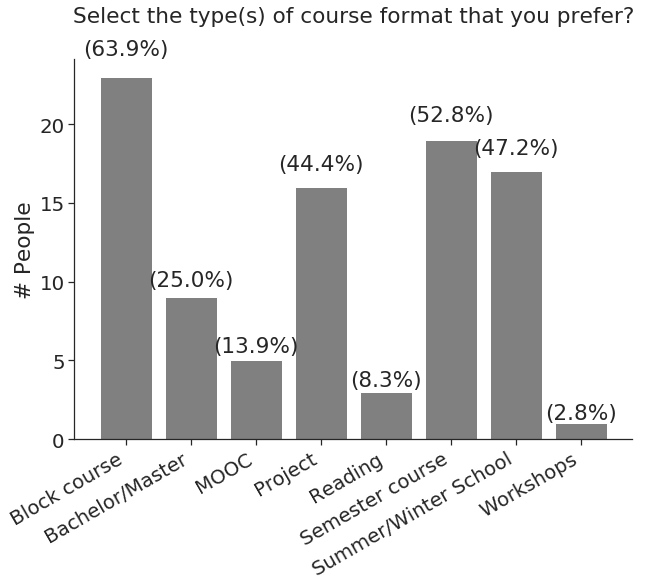

In [20]:
plt.figure(figsize=(10, 7), frameon=False)

sns.set_context("paper")
sns.set(font_scale = 1.8)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

rects = plt.bar(str_, counts, facecolor='gray')

for label in ax.get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment("right")
    

for i, rect in enumerate(rects):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
            '({:.1f}%)'.format(100*probas[i]),
            ha='center', va='bottom')


plt.ylabel('# People')

plt.title('Select the type(s) of course format that you prefer?', y=1.08)

In [21]:
arr = []
for elem in df['Tick in the list below the item which contributes the most to your progression during the thesis? (Multiple choices are possible)'].values:
    arr.append(elem.split(';'))
    
arr = np.array(flatten(arr))

In [22]:
np.unique(arr)

array(['Academic Writing', 'Conferences and congresses outside EPFL',
       'Courses other than the mandatory ones', 'Mandatory courses',
       'Master Courses', 'Seminars offered on campus',
       'Soft skill courses', 'Summer/Winter Schools',
       'Teaching assistanship',
       'courses offered by the Swiss Institute of Informatics',
       'feedback and meetings with advisors and other phd students in lab'],
      dtype='<U65')

In [23]:
long_str = ['Academic Writing', 
            'Conferences and congresses outside EPFL',
            'Courses other than the mandatory ones', 
            'Mandatory courses',
            'Master Courses', 
            'Seminars offered on campus',
            'Soft skill courses', 
            'Summer/Winter Schools',
            'Teaching assistanship',
            'courses offered by the Swiss Institute of Informatics',
            'feedback and meetings with advisors and other phd students in lab']


str_ = ['Academic Writing',
       'Conferences',
       'Other courses',
       'Mandatory courses',
       'Master courses',
       'Seminars on Campus',
       'Soft Skill',
       'Summer/Winter schools',
       'TA',
       'Courses by SII',
       'Feedback + Meeting']

counts = []
probas = []
for val in long_str:
    counts.append(np.sum(arr == val))
    probas.append(counts[-1]/len(df))

Text(0.5, 1.08, 'Which contributes the most to your progression during the thesis?')

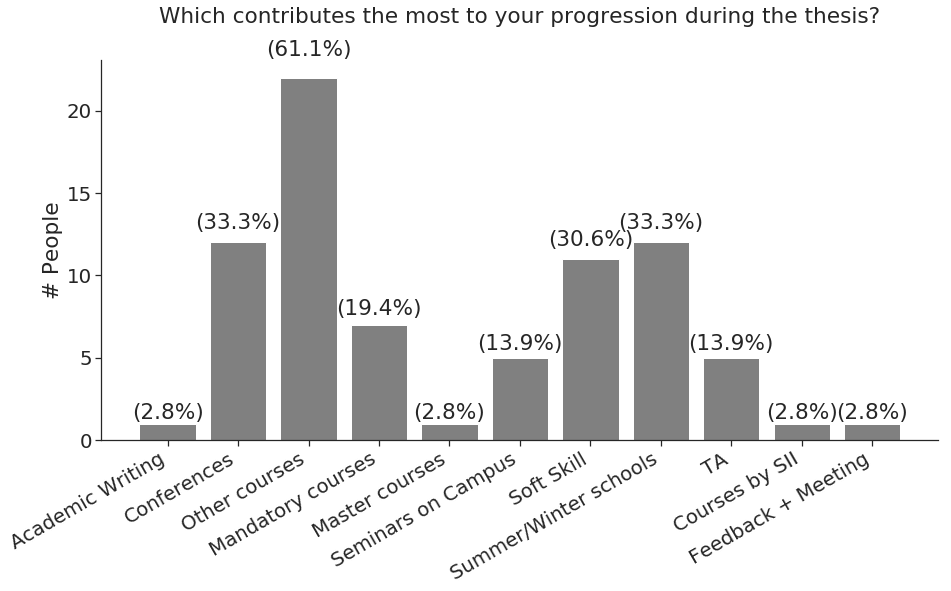

In [24]:
plt.figure(figsize=(15, 7), frameon=False)

sns.set_context("paper")
sns.set(font_scale = 1.8)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

rects = plt.bar(str_, counts, facecolor='gray')

for label in ax.get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment("right")
    

for i, rect in enumerate(rects):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
            '({:.1f}%)'.format(100*probas[i]),
            ha='center', va='bottom')


plt.ylabel('# People')

plt.title('Which contributes the most to your progression during the thesis?', y=1.08)

### Comment:

PhD students tend to use the coursebook webpage to choose their courses. In addition, colleagues and advisors tend to influence the students which is expected. 

In terms of courses, we can see that Block courses are the most popular. (Maybe due to time efficiency) Then, PhD students tend to like Projects, semester courses and summer/winter school. MOOC doesn't have a high interest among PhD students.

The mandatory courses only contributes to the progression of the thesis by 20% which is quite low. The other PhD courses are quite important for the PhDs which is expected. In addition, we can see that the Soft Skills courses, the Summer/Winter schools and the conferences are the most useful for the PhDs. This shows that the wide variety of topics cannot be covered by the limited set of mandatory courses.

# EDCE Coursebook

In [25]:
grades = df['How would you grade (in general) the EDCE course book?'].values

In [26]:
grades_count = []
for i in range(1,11):
    grades_count.append(np.sum(grades == i))

In [27]:
grades_count

[1, 1, 3, 6, 7, 8, 5, 5, 0, 0]

Text(0.5, 1.0, 'How would you grade the EDCE course book?')

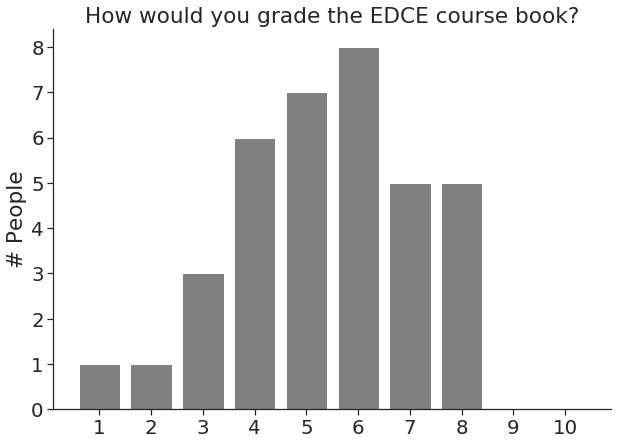

In [28]:
plt.figure(figsize=(10, 7), frameon=False)

sns.set_context("paper")
sns.set(font_scale = 1.8)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

rects = plt.bar(range(1, 11), grades_count, facecolor='gray')

plt.ylabel('# People')
plt.xticks(range(1,11))

plt.title('How would you grade the EDCE course book?')

In [29]:
print("Average grade: {:.2f}".format(np.mean(grades)))
print("Median grade: {:.2f}".format(np.median(grades)))

Average grade: 5.39
Median grade: 5.50


### Comment:

By looking at the distribution, the PhDs tend to have an average feeling towards the EDCE coursebook. The average and median values are quite close. However, it would be better to have a distribution pushed to the higher grades. Let's have a look what is happening. 


In [30]:
main_str = 'Among the 6 mandatory courses, which one do you consider relevant for your thesis?'

long_str = ['Data Analysis for Science and Engineering', 
            'Optimization and simulation',
            'Fourier analysis and boundary value problems', 
            'Scientific programming for engineers',
            'Information Science in Engineering', 
            'Understanding Statistics and Experimental design']


str_ = ['Data Analysis',
       'OptiSim',
       'Fourier Analysis',
       'Scientific prog',
       'Information Science',
       'Stats & Exp design']

str_to_val = {'Strongly Agree': 2,
             'Agree': 1,
             'Undecided / Neutral': 0,
             'Disagree': -1,
             'Strongly Disagree': -2}

In [31]:
grades_per_course = []
for s in long_str:
    strs = df[main_str + ' [' + s + ']'].values
    grades_per_course.append([str_to_val[tmp] for tmp in strs])

Text(0.5, 1.0, 'Among the 6 mandatory courses, which one \ndo you consider relevant for your thesis?')

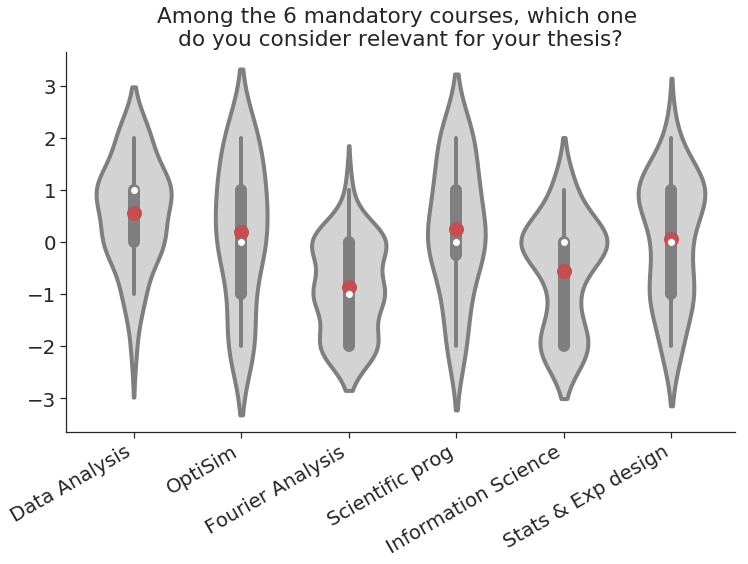

In [32]:
plt.figure(figsize=(12, 7), frameon=False)

sns.set_context("paper")
sns.set(font_scale = 1.8)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

sns.violinplot(data=grades_per_course, inner="box", color='lightgray', linewidth=4)

plt.xticks(range(len(str_)), str_)

for label in ax.get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment("right")
    
plt.plot(np.mean(grades_per_course, axis=1), 'ro', markersize=10, markeredgewidth=5)

plt.title('Among the 6 mandatory courses, which one \ndo you consider relevant for your thesis?')

### Comment:

By looking at the mandatory courses individually, most of them are graded average which is expected. It seems that the courses *Fourier analysis and boundary value problems* and *Information Science in Engineering* are skewed at the bottom. The other four courses have expected distributions. The course *Understanding Statistics and Experimental design* has some kind of bimodal distribution which is expected between experimental and non-experimental works. The grades for the course *Information Science in Engineering* is either neutral or negative. The reason is unknown. The course *Fourier analysis and boundary value problems* seems to be very specific (maybe too much) receiving only neutral and bad grades.

=> **Conclusion**: Fourier course is too specific. Seems to be the same for Information Science. The rest seems ok based on the different topics in research. 

Comments from the PhDs:

In [33]:
comments = df['Comments on your ratings?'].dropna().values
for c in comments:
    print(c)
    print()

It's difficult to choose the right course that is relevant for our thesis among only 6 courses. My topic is in between Mathematics and Computer Science, so these courses are not really useful or I've already done similar courses.

Too limited choice in the courses

It does not only depend on the topics covered, but also on the method, how the course is taught, whether it is useful  for the application in research

general statistic courses are useful, because they are general. Other courses are too specific to be relevant in my case

I have only attended one of them which was very useful. The rest, except from the "Understanding Statistics..." that from previous experiences from former PhD was not useful at all, just from the tittle they do not seem like useful tools for my research. 

Not enough variety of good courses

I am currently enrolled in DA and OS, the idea of DA is more relevant than the execution of the course (at least so far)

I can not say relevant or not if do not take 

### Comment:

It seems that there are two main issues:
1. There are not enough general courses that could be useful for most PhDs. (Specific courses are too specific by definition)
2. There are not enough different specific courses.

Possible solution => Either a lot more specific courses or only general courses.

In [34]:
tmp = df['Which of the mandatory courses have you followed (and got credits for)?'].values

In [35]:
arr = []
for elem in tmp:
    arr.append(elem.split(';'))
    
arr = np.array(flatten(arr))

In [36]:
long_str = ['Data Analysis for Science and Engineering', 
            'Optimization and simulation',
            'Fourier analysis and boundary value problems', 
            'Scientific programming for engineers',
            'Information Science in Engineering', 
            'Understanding Statistics and Experimental design',
            'None of them']


str_ = ['Data Analysis',
       'OptiSim',
       'Fourier Analysis',
       'Scientific prog',
       'Information Science',
       'Stats & Exp design',
       'None']

counts = []
probas = []
for val in long_str:
    counts.append(np.sum(arr == val))
    probas.append(counts[-1]/len(df))

Text(0.5, 1.08, 'Which of the mandatory courses have you followed (and got credits for)?')

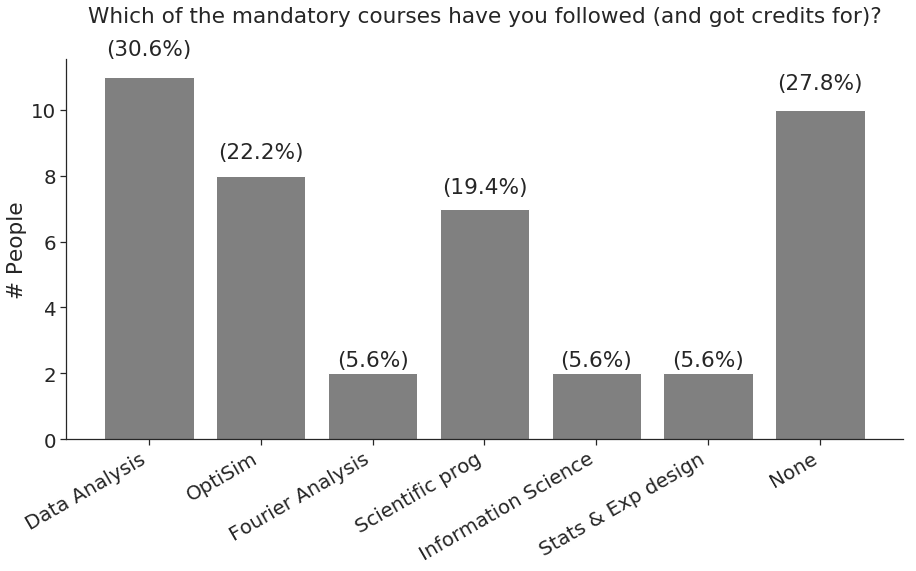

In [37]:
plt.figure(figsize=(15, 7), frameon=False)

sns.set_context("paper")
sns.set(font_scale = 1.8)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

rects = plt.bar(str_, counts, facecolor='gray')

for label in ax.get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment("right")
    

for i, rect in enumerate(rects):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
            '({:.1f}%)'.format(100*probas[i]),
            ha='center', va='bottom')


plt.ylabel('# People')

plt.title('Which of the mandatory courses have you followed (and got credits for)?', y=1.08)

In [38]:
str_to_val = {'Very useful': 2,
             'Fairly useful': 1,
             'Neutral': 0,
             'Not very useful': -1,
             'Useless': -2}

In [39]:
grade = [str_to_val[s] for s in df['What about the other recommended courses?'].values]

In [40]:
print("Average rating on the other courses: {:.2f}".format(np.mean(grade)))
print("Median rating on the other courses: {:.2f}".format(np.median(grade)))

Average rating on the other courses: -0.19
Median rating on the other courses: 0.00


### Comment:

The more general courses tend to be taken more often than the more specific courses (which is expected). Quite a lot of people have never taken any of the mandatory courses. (Even after removing the people that have done 0 credits -> 7). 

Concerning the other recommended courses, people are either neutral or negative.

# Improvements

Here, we want to have a look at the proposed improvements by the PhDs.

In [41]:
main_str = 'Ideally, I would like to have [...]'

for c in df.columns:
    if main_str in c:
        print(c)

Ideally, I would like to have [...] [more courses on general engineering topics.]
Ideally, I would like to have [...] [more specific courses (closer to my research).]
Ideally, I would like to have [...] [courses developing my soft skills.]
Ideally, I would like to have [...] [more workshops.]
Ideally, I would like to have [...] [more research related courses.]
Ideally, I would like to have [...] [more summer/winter schools.]


In [42]:
long_str = ['more courses on general engineering topics.', 
            'more specific courses (closer to my research).',
            'courses developing my soft skills.', 
            'more workshops.',
            'more research related courses.', 
            'more summer/winter schools.']


str_ = ['General courses',
       'Specific courses',
       'Soft skills courses',
       'Workshops',
       'Research related courses',
       'Summer/Winter schools']

str_to_val = {'Strongly Agree': 2,
             'Agree': 1,
             'Undecided / Neutral': 0,
             'Disagree': -1,
             'Strongly Disagree': -2}

In [43]:
grades_per_course = []
for s in long_str:
    strs = df[main_str + ' [' + s + ']'].values
    grades_per_course.append([str_to_val[tmp] for tmp in strs])

Text(0.5, 1.0, 'Ideally, I would like to have more [...]')

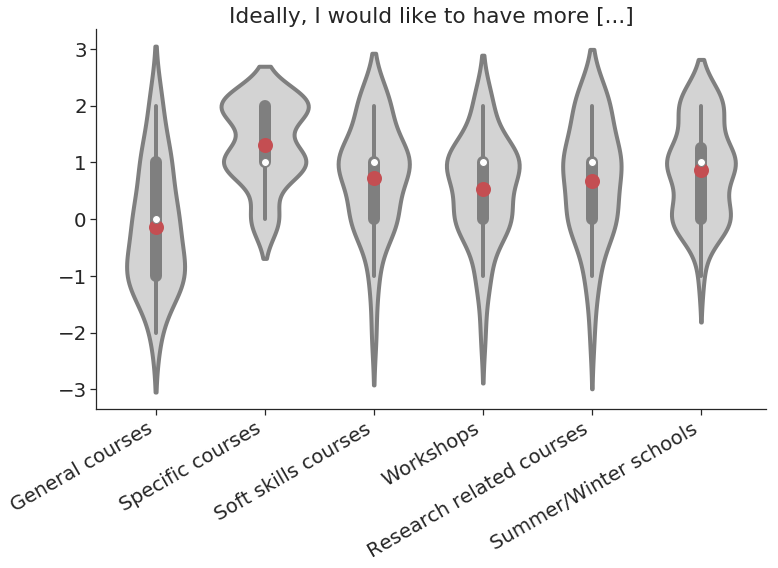

In [44]:
plt.figure(figsize=(12, 7), frameon=False)

sns.set_context("paper")
sns.set(font_scale = 1.8)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

sns.violinplot(data=grades_per_course, inner="box", color='lightgray', linewidth=4)

plt.xticks(range(len(str_)), str_)

for label in ax.get_xmajorticklabels():
    label.set_rotation(30)
    label.set_horizontalalignment("right")
    
plt.plot(np.mean(grades_per_course, axis=1), 'ro', markersize=10, markeredgewidth=5)

plt.title('Ideally, I would like to have more [...]')

### Comment:

PhD Students do want more specific courses and more summer/winter schools. The general courses are therefore not the answer. 

In [45]:
print("Improvements proposed by the students:")
print()

for r in df['If you could improve one thing right now, what would it be?'].dropna().values:
    print(r)
    print()
    


Improvements proposed by the students:

I don't think the mandatory courses are really useful. We have too many different topics in EDCE to be able to touche everybody's research with only 6 courses. Thus, I would remove the mandatory courses.

Make sur MOOCs can count for credits.  

Ease the exchange for course in other university (ETHZ, UNIL...)

Do not have a list of mandatory courses and give more freedom of choice to the students

No restriction on bachelor courses. Courses should automatically be counted also if no grade is given. Credits should also be possible to be obtained for organizing events or external workshops, where no grade is given but a lot of time invested.

Increase the choice of mandatory courses

 I will add more options for courses, currently they are very advance or not realated at all to my project. 

More advanced courses (PhD level) in Statistics/Optimization/ML

more courses specific on environmental microbiology, on water treatment or on general environm

In [46]:
print("Suggestion for additional courses proposed by the students:")
print()

for r in df['If you could suggest an additional EDCE course, what would it be?'].dropna().values:
    print(r)
    print()
    

Suggestion for additional courses proposed by the students:

No idea

Advanced courses on traffic engineering

Good experimental practice in civil engineering

Scientific writing, Risk and hazard analysis, Sustainability assessment

Project management

Machine Learning (advanced)

environmental microbiology, water and wastewater treatment or chemistry

Transportation related

Stochastic modelling or model calibration

machine learning and deep learning

ML / Python / Business concept (like soft / management) course

Machine learning and data mining



### Comment:

Most of the required improvements or additional courses are about Machine Learning. => We should definitely give them a course on this. )(4/12) Some other specific courses as well. 

In [47]:
print("Anything else?")
print()

for r in df['Anything else that you would like to share with us?'].dropna().values:
    print(r)
    print()

Anything else?

I did two of the mandatory courses during my Master. So, I didn't have to do any of the mandatory courses for my PhD. 

I took the optimization and simulation course during my master's degree, hence I cannot take it during my PhD.

Nice survey =)

Why google form ? Very high friction to log in.

Why do we need mandatory course during first year? It is bad when the available course are not good but it intersects with other more interesting courses... 1 mandatory course during 2 years is Ok

In general I was quite satisfied with my courses. I think block courses on a specific subject are the most valuable



# Conclusion

From what we've seen people are not satisfied nor disatisfied with the EDCE coursebook. It seems that the PhD students take more general courses but because they don't really have a choice. Ideally, they would like to have more specific courses available, especially in Machine Learning.

=> We need to think about the coursebook and make it better. Here are some propositions:
- Get rid of the mandatory courses and ask students to do at list 4 credits during the first year. They can choose between PhD and master courses to have more choices between specific courses. The courses have to be accepted by the supervisor (and maybe someone external?)
- Get inspiration from EDIC => Create 2-3 (or maybe more) branches and add courses inside these branches. In EDIC, they have 3 branches with 5-6 depth courses for each branch which already gives a lot more choices.
- Add a tons more courses in the mandatory courses bucket. 

It's good to have the recommended courses just in case, even if the responses show that they don't always use it. 